In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
from pandas import read_csv

**##Part 1 - Data Loading & preparation**

In [3]:
#import the data
df=pd.read_csv('ai4i2020.csv')

# source: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

In [4]:
#explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
#explore unique data in each column
for col in df:
    print(col, "::\n", df[col].unique(), "\n\n")

UDI ::
 [    1     2     3 ...  9998  9999 10000] 


Product ID ::
 ['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859'] 


Type ::
 ['M' 'L' 'H'] 


Air temperature [K] ::
 [298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5] 


Process temperature [K] ::
 [308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5 308.8 308.4
 308.3 308.2 308.1 308.  307.9 309.6 309.7 309.8 309.9 310.  310.1 310.2
 307.8 307.7 307.6 307.5 307.4 307.3 307.2 307.1 307.  306.9 306.8 306.7
 306

In [8]:
#detect null values
df.isnull().values.any()
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
# Identifying rows where 'machine failure' is 1 but all failure modes are 0
condition_1 = (
    (df['Machine failure'] == 1) & 
    (df['TWF'] == 0) & 
    (df['HDF'] == 0) & 
    (df['PWF'] == 0) & 
    (df['OSF'] == 0) & 
    (df['RNF'] == 0)
)

# Identifying rows where 'machine failure' is 0 but at least one failure mode is 1
condition_2 = (
    (df['Machine failure'] == 0) & 
    ((df['TWF'] == 1) | 
     (df['HDF'] == 1) | 
     (df['PWF'] == 1) | 
     (df['OSF'] == 1) | 
     (df['RNF'] == 1))
)


In [10]:

print(f" There are {len(df[condition_1])} cases that machine failure = 1 but all failor modes = 0")
print(f" There are {len(df[condition_2])} cases that machine failure = 0 but some failor mode = 1")

 There are 9 cases that machine failure = 1 but all failor modes = 0
 There are 18 cases that machine failure = 0 but some failor mode = 1


In [11]:
df.loc[condition_1, 'Machine failure'] = 0
df.loc[condition_2, 'Machine failure'] = 1

In [12]:
print(df.duplicated().sum())

0


**##Part 2 - Data exploration**

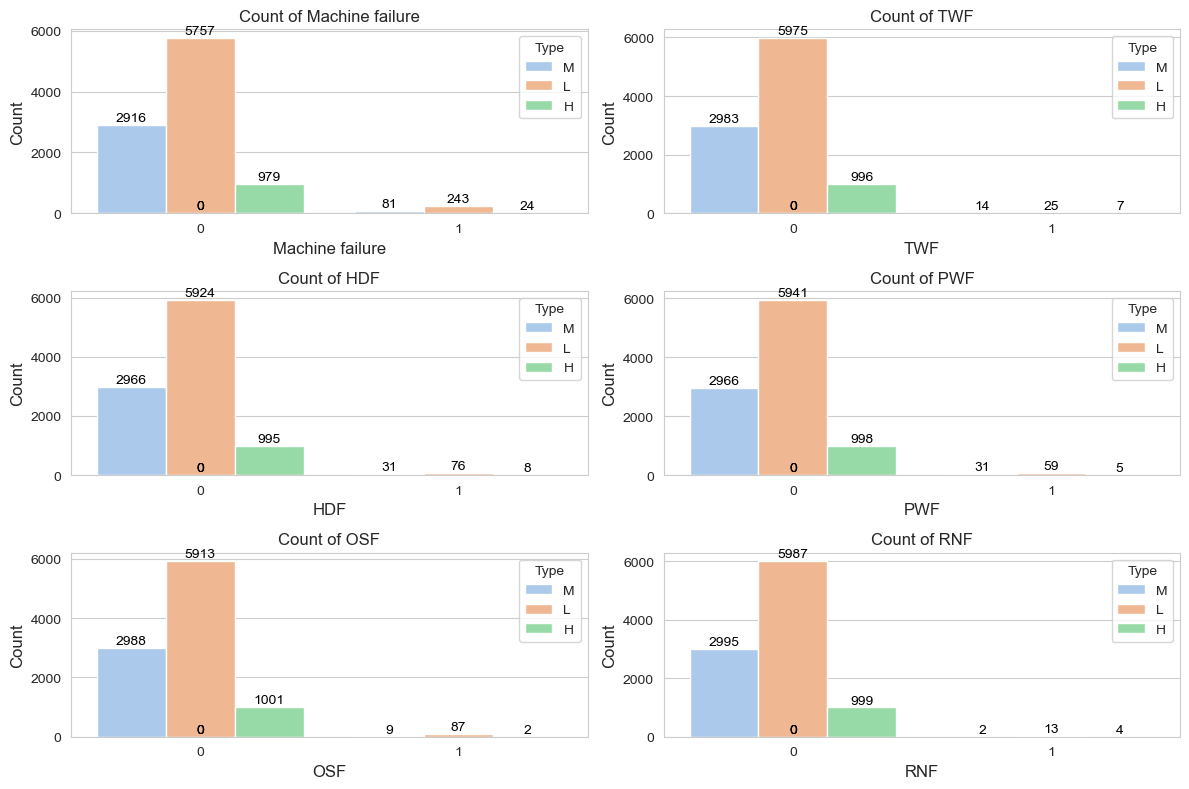

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for the plot
sns.set_style("whitegrid")

# List of failure modes
failure_modes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Create subplots
plt.figure(figsize=(12, 8))
for i, mode in enumerate(failure_modes, 1):
    plt.subplot(3, 2, i)
    ax = sns.countplot(x=mode, data=df,palette="pastel",hue='Type')
    ax.set_title(f'Count of {mode}')
    
    # Label count on each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', 
                    xytext=(0, 5), textcoords='offset points')
    
    # Set label for x and y axis
    ax.set_xlabel(f'{mode}', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
g2 = df['Type'].value_counts()

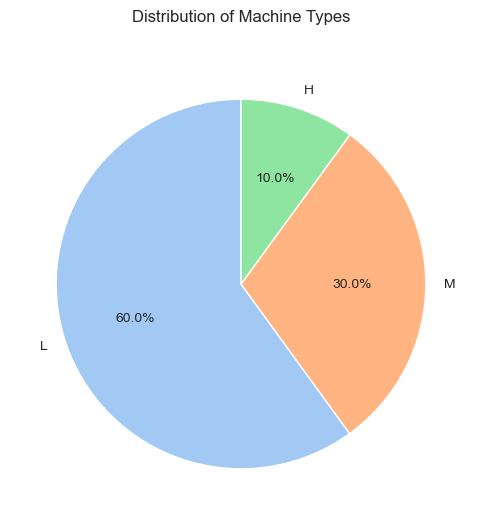

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


colors = sns.color_palette("pastel")
g2.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=colors)
plt.title('Distribution of Machine Types', y=1.05)
plt.ylabel('')
plt.show()



In [17]:
g3 = df[df['Machine failure']==1]['Type'].value_counts()

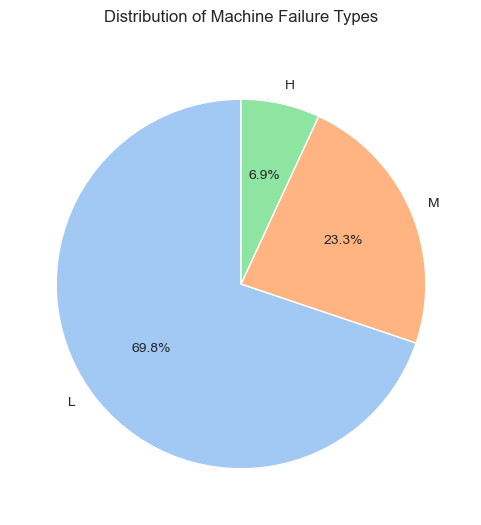

In [18]:

g3.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(6, 6), colors=colors)
plt.title('Distribution of Machine Failure Types', y=1.05)
plt.ylabel('')
plt.show()


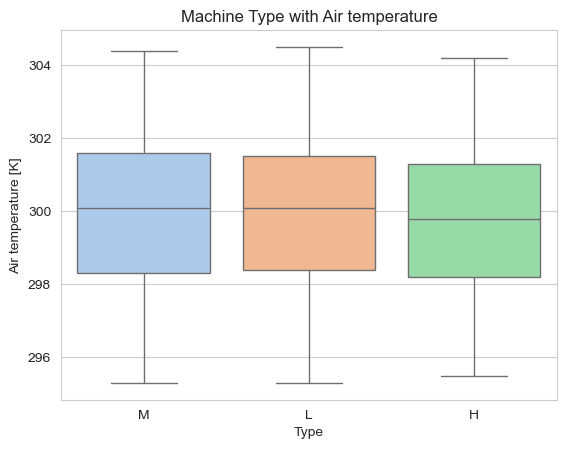

In [19]:
#check the data range
sns.boxplot(data=df, x='Type', y='Air temperature [K]',palette="pastel",hue='Type')
plt.title('Machine Type with Air temperature')
plt.show()

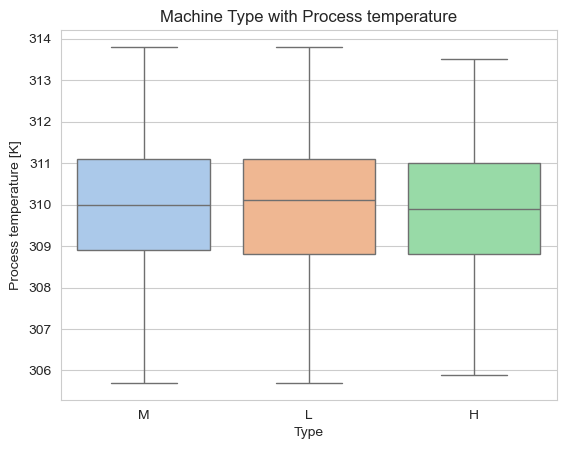

In [20]:
sns.boxplot(data=df, x='Type', y='Process temperature [K]',palette="pastel",hue='Type')
plt.title('Machine Type with Process temperature')
plt.show()

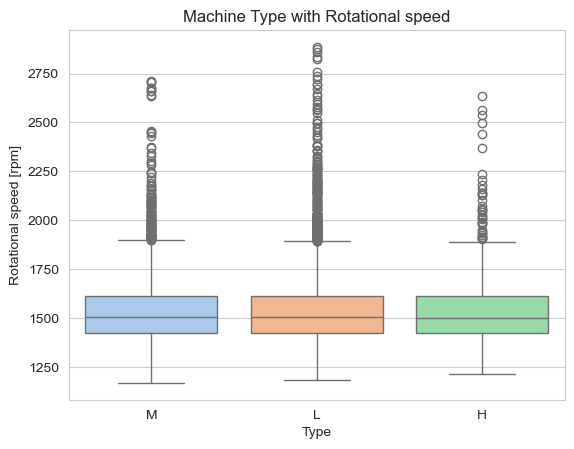

In [21]:
sns.boxplot(data=df, x='Type', y='Rotational speed [rpm]',palette="pastel",hue='Type')
plt.title('Machine Type with Rotational speed')
plt.show()

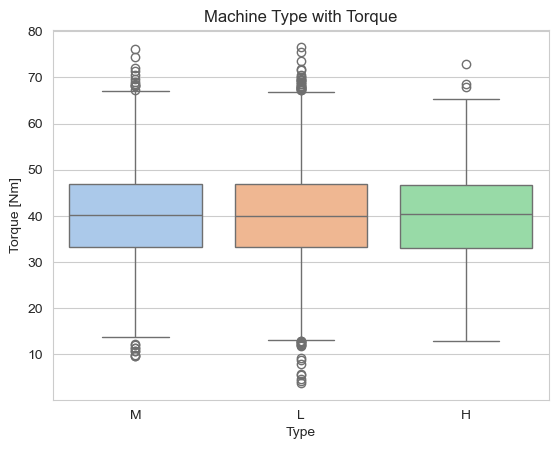

In [22]:
sns.boxplot(data=df, x='Type', y='Torque [Nm]',palette="pastel",hue='Type')
plt.title('Machine Type with Torque')
plt.show()

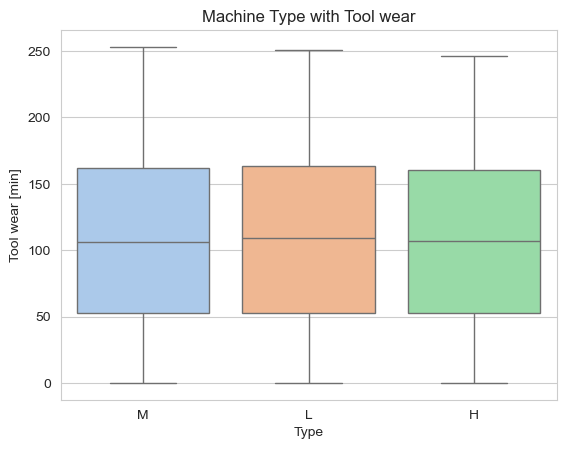

In [23]:
sns.boxplot(data=df, x='Type', y='Tool wear [min]',palette="pastel",hue='Type')
plt.title('Machine Type with Tool wear')
plt.show()

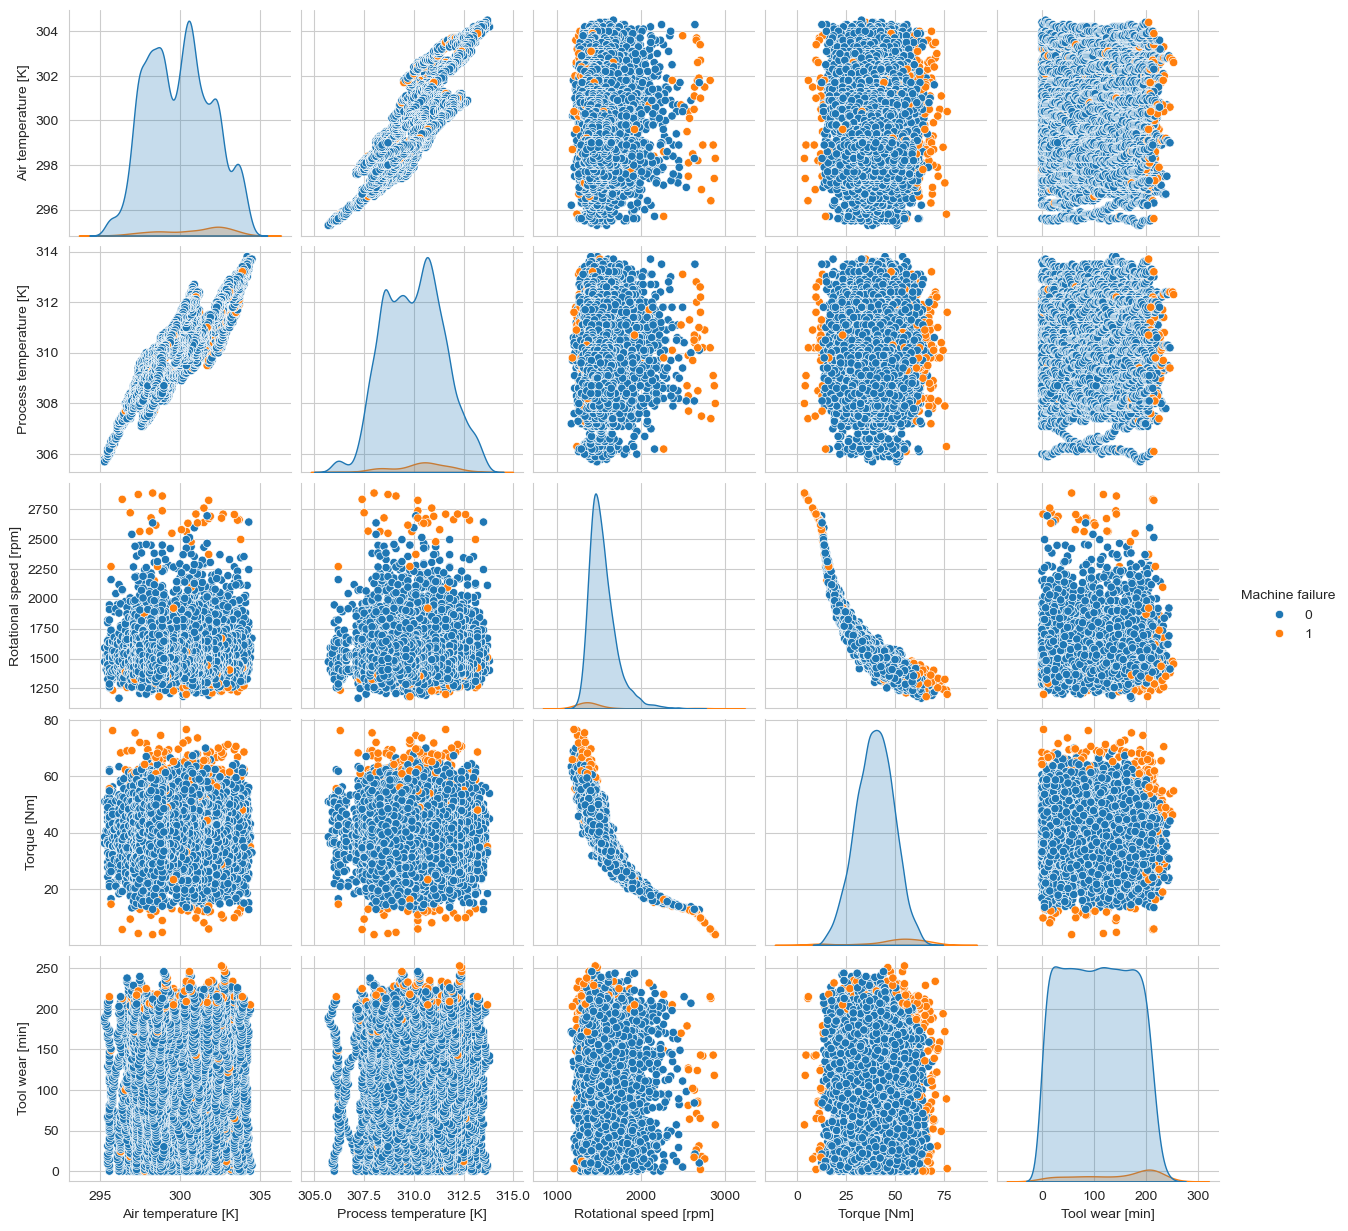

In [24]:
condition_df=df[["Type","Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]","Machine failure"]]
sns.pairplot(data= condition_df,hue="Machine failure")

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_19704\2295837591.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=condition_df, x="Machine failure", y=feature, palette="Set2")
C:\Users\Windows 11\AppData\Local\Temp\ipykernel_19704\2295837591.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=condition_df, x="Machine failure", y=feature, palette="Set2")
C:\Users\Windows 11\AppData\Local\Temp\ipykernel_19704\2295837591.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=condition_df, x="Machine failure", y=feature, palet

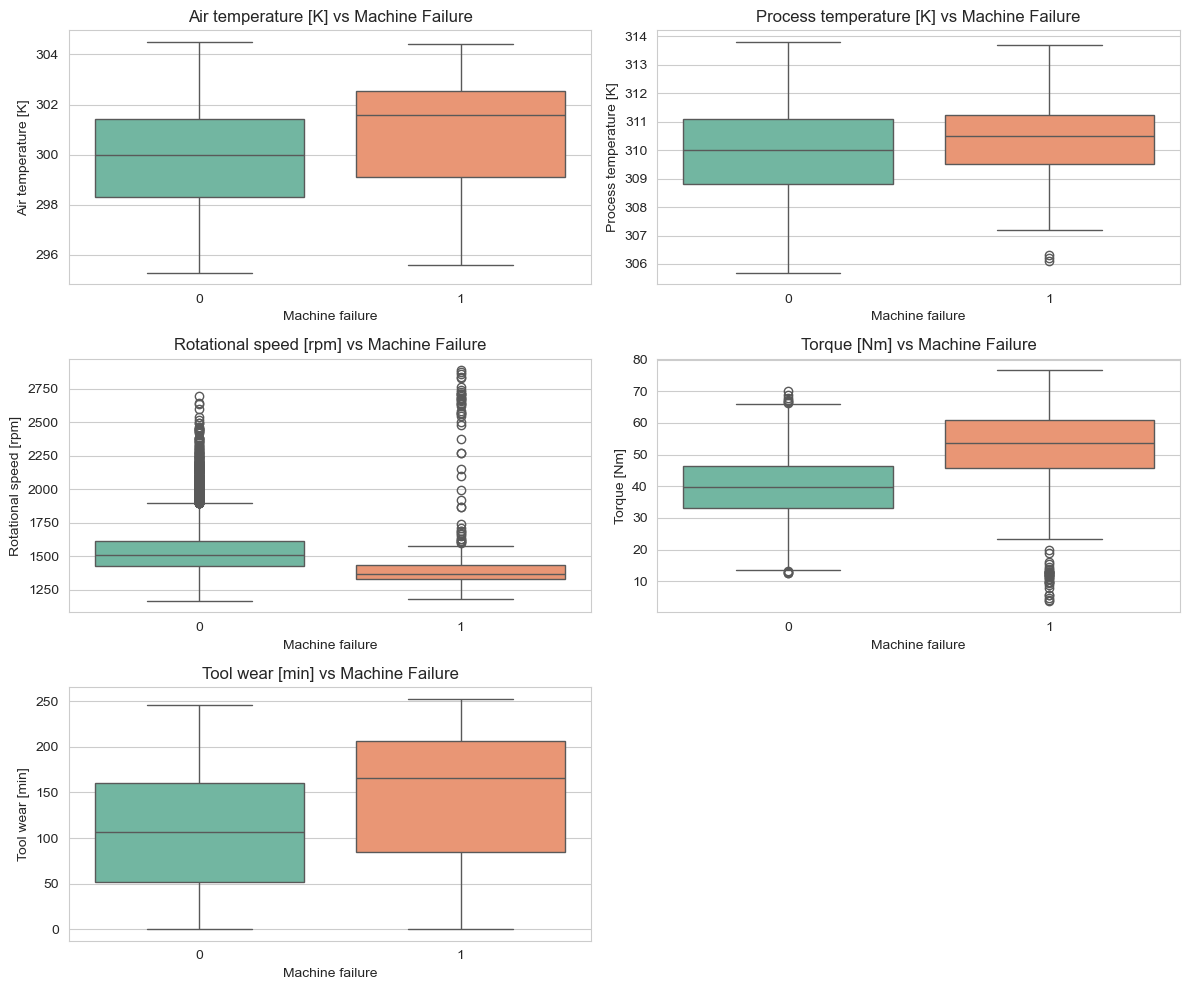

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for each feature
features = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=condition_df, x="Machine failure", y=feature, palette="Set2")
    plt.title(f'{feature} vs Machine Failure')

plt.tight_layout()
plt.show()


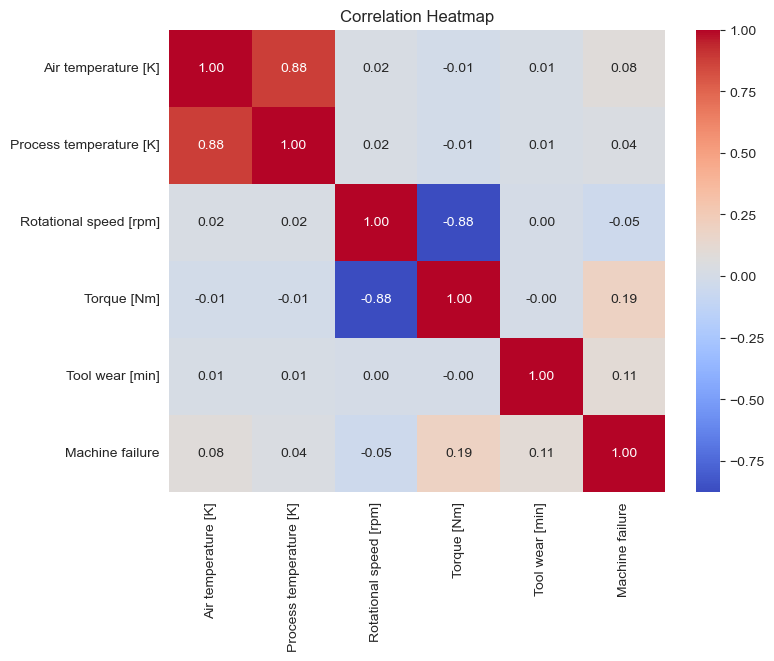

In [26]:
condition2_df=df[["Air temperature [K]","Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]","Machine failure"]]
corr_matrix = condition2_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**##Part 3  - Feature encoding**

In [28]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import explained_variance_score
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold



In [29]:
le = LabelEncoder()
final_df =df.copy()

In [30]:
final_df.drop(['UDI','Product ID'],axis=1, inplace=True)

In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [32]:
mapping = {'L': 0, 'M': 1, 'H': 2}
final_df['Type_encoded'] = final_df['Type'].map(mapping)

In [33]:
final_df.drop(['Type'],axis=1, inplace=True)
final_df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_encoded
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0


In [34]:
scalar = MinMaxScaler(feature_range=(0, 1))
final_df_scaled = scalar.fit_transform(final_df)
final_df = pd.DataFrame(final_df_scaled, columns=final_df.columns)
final_df.head()
final_df.head()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_encoded
0,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
target_column = 'Machine failure'
columns = [col for col in final_df.columns if col != target_column]
final_df = final_df[columns + [target_column]]
final_df.head()


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_encoded,Machine failure
0,0.304348,0.358025,0.222934,0.535714,0.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.0
1,0.315217,0.370370,0.139697,0.583791,0.011858,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.304348,0.345679,0.192084,0.626374,0.019763,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315217,0.358025,0.154249,0.490385,0.027668,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.315217,0.370370,0.139697,0.497253,0.035573,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Model: RandomForestClassifier

Model metrics for Machine failure:
Accuracy: 0.9780
Precision: 0.9286
Recall: 0.5049
F1-Score: 0.6541
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2397
         1.0       0.93      0.50      0.65       103

    accuracy                           0.98      2500
   macro avg       0.95      0.75      0.82      2500
weighted avg       0.98      0.98      0.97      2500



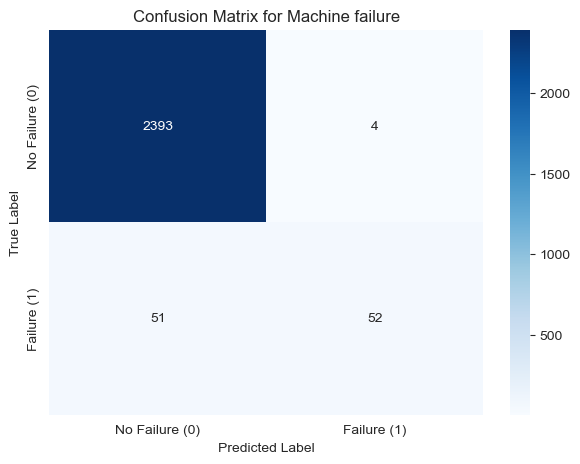


Model metrics for TWF:
Accuracy: 0.9952
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2488
         1.0       0.00      0.00      0.00        12

    accuracy                           1.00      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.99      1.00      0.99      2500



C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 11\anaconda3\Lib

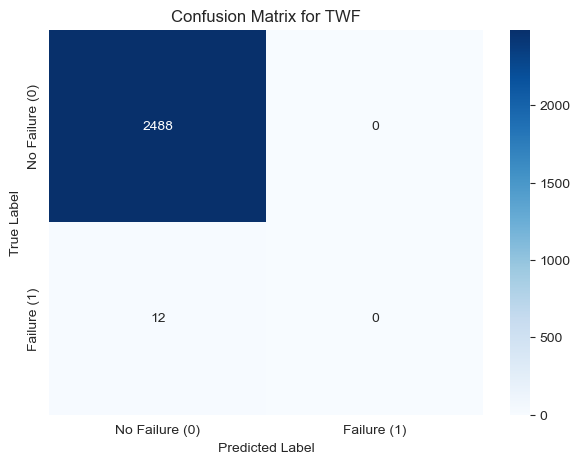


Model metrics for HDF:
Accuracy: 0.9944
Precision: 0.9286
Recall: 0.6842
F1-Score: 0.7879
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2462
         1.0       0.93      0.68      0.79        38

    accuracy                           0.99      2500
   macro avg       0.96      0.84      0.89      2500
weighted avg       0.99      0.99      0.99      2500



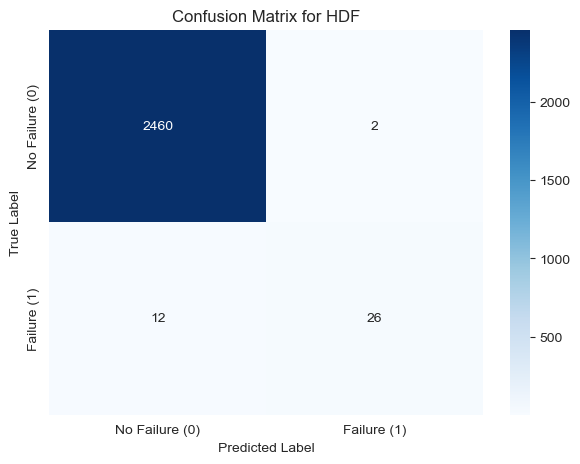


Model metrics for PWF:
Accuracy: 0.9968
Precision: 1.0000
Recall: 0.7037
F1-Score: 0.8261
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2473
         1.0       1.00      0.70      0.83        27

    accuracy                           1.00      2500
   macro avg       1.00      0.85      0.91      2500
weighted avg       1.00      1.00      1.00      2500



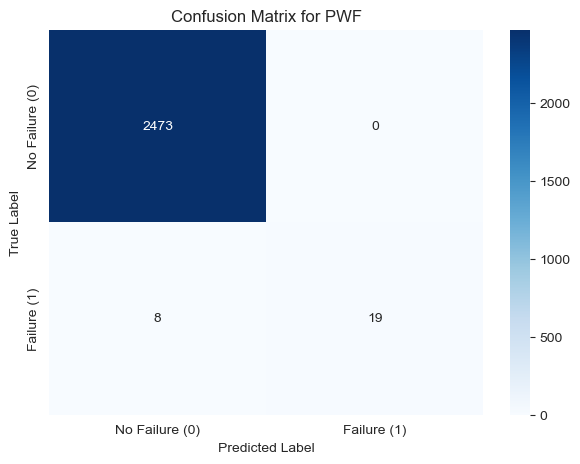


Model metrics for OSF:
Accuracy: 0.9972
Precision: 1.0000
Recall: 0.7407
F1-Score: 0.8511
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2473
         1.0       1.00      0.74      0.85        27

    accuracy                           1.00      2500
   macro avg       1.00      0.87      0.92      2500
weighted avg       1.00      1.00      1.00      2500



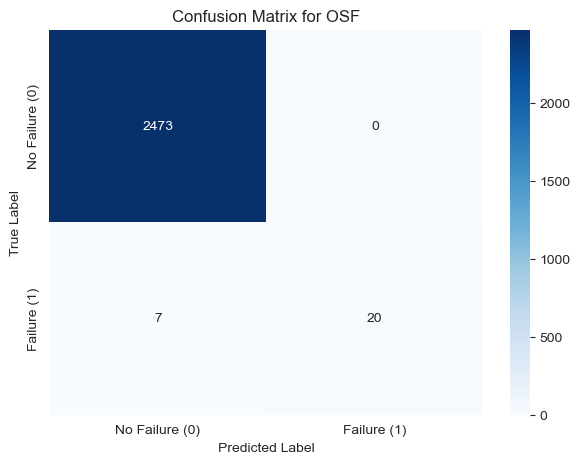


Model metrics for RNF:
Accuracy: 0.9988
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2497
         1.0       0.00      0.00      0.00         3

    accuracy                           1.00      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       1.00      1.00      1.00      2500



C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Windows 11\anaconda3\Lib

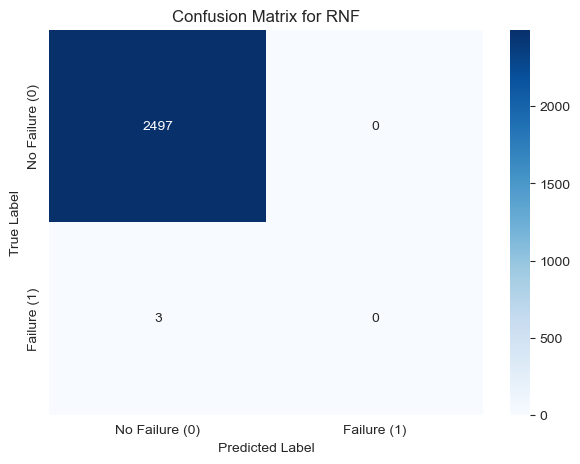

----------------------------------------------------------------------------------------------------

Model: DecisionTreeClassifier

Model metrics for Machine failure:
Accuracy: 0.9700
Precision: 0.6489
Recall: 0.5922
F1-Score: 0.6193
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2397
         1.0       0.65      0.59      0.62       103

    accuracy                           0.97      2500
   macro avg       0.82      0.79      0.80      2500
weighted avg       0.97      0.97      0.97      2500



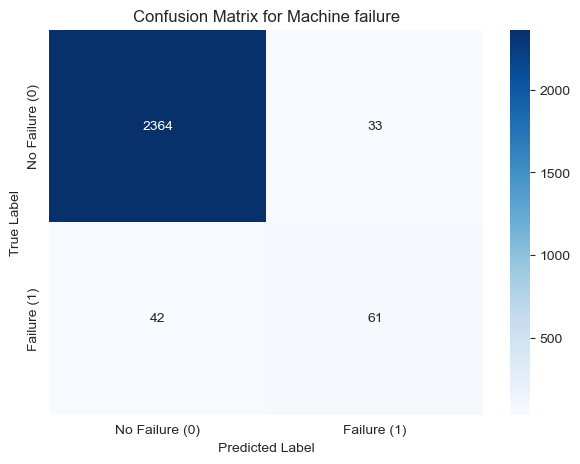


Model metrics for TWF:
Accuracy: 0.9928
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2488
         1.0       0.00      0.00      0.00        12

    accuracy                           0.99      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       0.99      0.99      0.99      2500



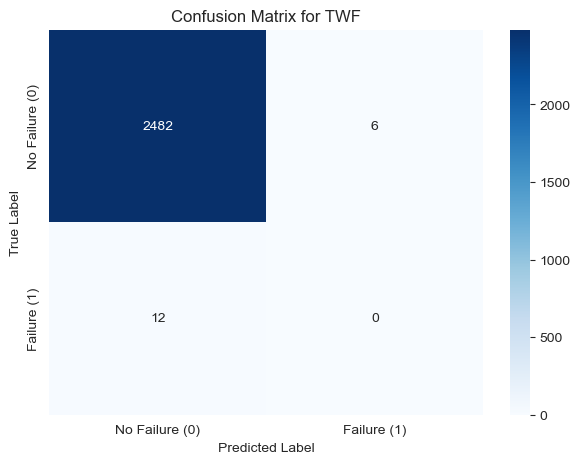


Model metrics for HDF:
Accuracy: 0.9956
Precision: 0.8462
Recall: 0.8684
F1-Score: 0.8571
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2462
         1.0       0.85      0.87      0.86        38

    accuracy                           1.00      2500
   macro avg       0.92      0.93      0.93      2500
weighted avg       1.00      1.00      1.00      2500



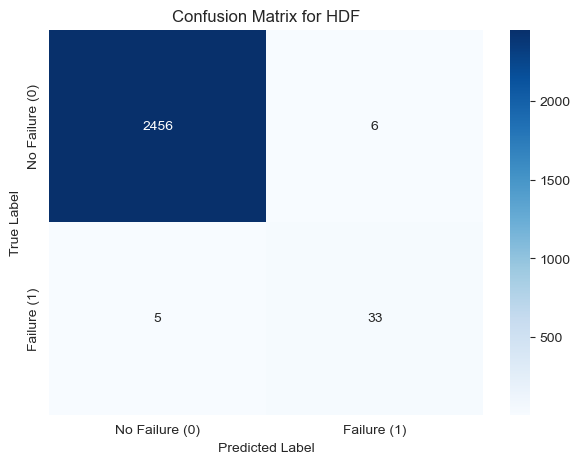


Model metrics for PWF:
Accuracy: 0.9956
Precision: 0.7667
Recall: 0.8519
F1-Score: 0.8070
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2473
         1.0       0.77      0.85      0.81        27

    accuracy                           1.00      2500
   macro avg       0.88      0.92      0.90      2500
weighted avg       1.00      1.00      1.00      2500



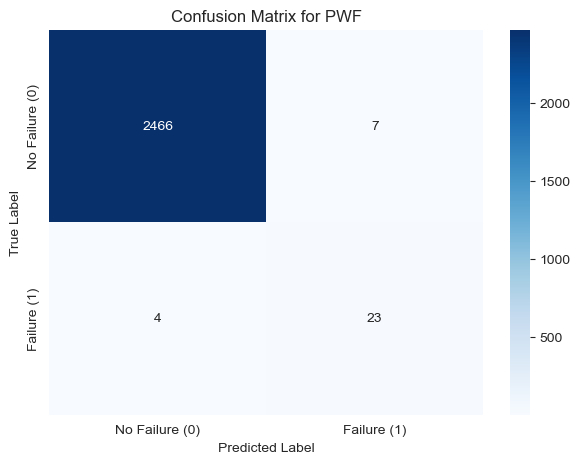


Model metrics for OSF:
Accuracy: 0.9964
Precision: 0.8462
Recall: 0.8148
F1-Score: 0.8302
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2473
         1.0       0.85      0.81      0.83        27

    accuracy                           1.00      2500
   macro avg       0.92      0.91      0.91      2500
weighted avg       1.00      1.00      1.00      2500



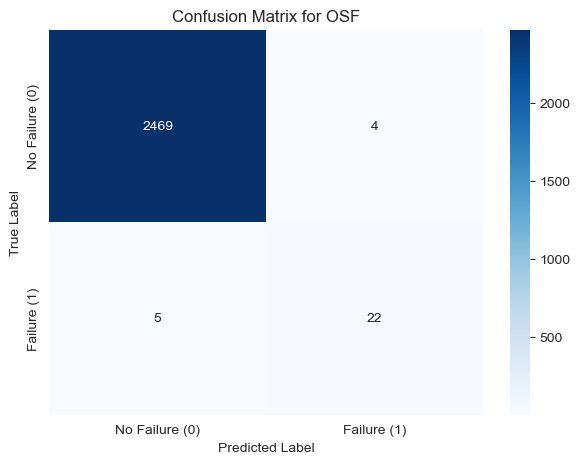


Model metrics for RNF:
Accuracy: 0.9964
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2497
         1.0       0.00      0.00      0.00         3

    accuracy                           1.00      2500
   macro avg       0.50      0.50      0.50      2500
weighted avg       1.00      1.00      1.00      2500



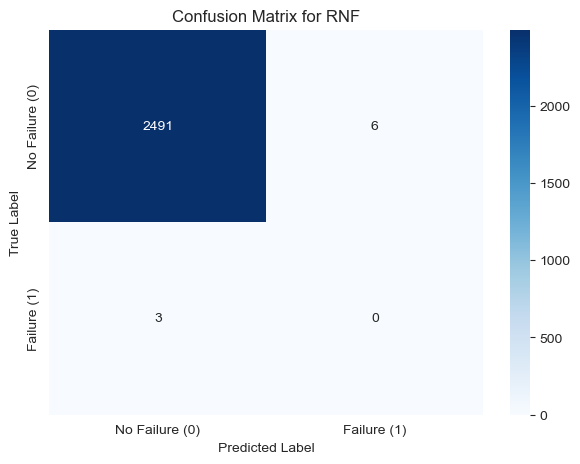

----------------------------------------------------------------------------------------------------


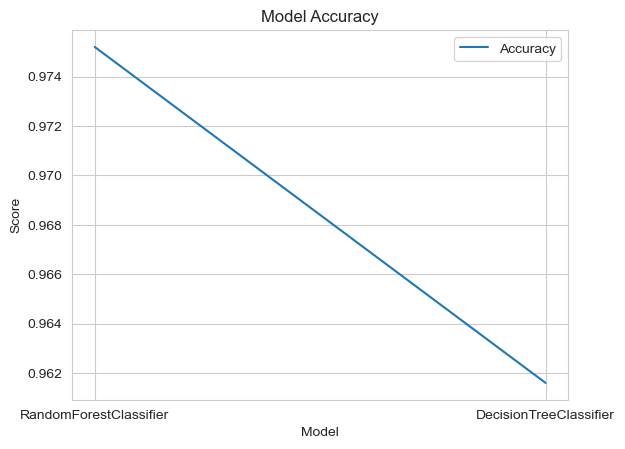

In [63]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.multioutput import MultiOutputClassifier

# Define failure modes (targets)
failure_modes = ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Split the dataset into features and targets
X = final_df.drop(failure_modes, axis=1)
y = final_df[failure_modes]

# Split data into training and test sets (fixed split ratio of 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

# Define the models to test
models = [RandomForestClassifier(class_weight='balanced', random_state=21), DecisionTreeClassifier(class_weight='balanced', random_state=21)]

# Set up KFold for cross-validation (5 splits)
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Initialize empty lists to store performance metrics
accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []

# Loop over models
for model in models:
    multi_output_model = MultiOutputClassifier(model)

    # Perform cross-validation for each model
    accuracy = cross_val_score(multi_output_model, X_train, y_train, cv=cv, scoring='accuracy')
    
    # Train the model on the full training set
    multi_output_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = multi_output_model.predict(X_test)

    # Print model metrics for each failure mode
    print(f"\nModel: {type(model).__name__}")
    for idx, failure_mode in enumerate(failure_modes):
        print(f"\nModel metrics for {failure_mode}:")
        print(f"Accuracy: {accuracy_score(y_test[failure_mode], y_pred[:, idx]):.4f}")
        print(f"Precision: {precision_score(y_test[failure_mode], y_pred[:, idx]):.4f}")
        print(f"Recall: {recall_score(y_test[failure_mode], y_pred[:, idx]):.4f}")
        print(f"F1-Score: {f1_score(y_test[failure_mode], y_pred[:, idx]):.4f}")
        print("Classification Report:\n", classification_report(y_test[failure_mode], y_pred[:, idx]))
        
        # Calculate and plot confusion matrix for each failure mode
        cm = confusion_matrix(y_test[failure_mode], y_pred[:, idx])

        # Plot the confusion matrix with labels
        plt.figure(figsize=(7, 5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure (0)', 'Failure (1)'], yticklabels=['No Failure (0)', 'Failure (1)'])

        # Add labels and title
        plt.title(f'Confusion Matrix for {failure_mode}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        
        # Show the plot
        plt.show()
    print("-" * 100)

    # Append test set scores to the lists (to compare test performance)
    accuracy_scores.append(np.mean(accuracy))

# Plot the performance metrics for the model
plt.plot([type(model).__name__ for model in models], accuracy_scores, label='Accuracy')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [65]:
import pickle

final_model = RandomForestClassifier().fit(X_train, y_train)

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

print("Model saved successfully!")


Model saved successfully!


In [67]:
print(final_df.columns)

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Type_encoded', 'Machine failure'],
      dtype='object')
